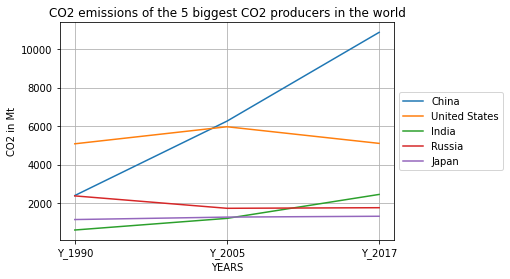

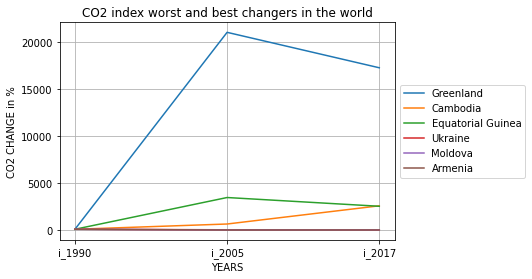

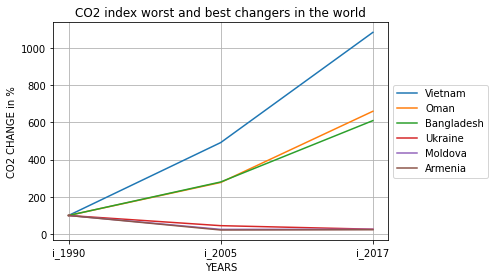

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# importeer tabel uit wikipedia
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
CO2_countries = tables[1]

# Verander de kolomnamen van de tabel
CO2_countries.columns = ['country', 'Y_1990', 'Y_2005', 'Y_2017', 'perc_2017', 'change_1990_2017', 'PER_KM2_2017', 'PER_CAP_2017', 'INCL_LUCF_2018', 'EXCL_LUCF_2018']

# verwijder de rijen die geen landen zijn
CO2_countries = CO2_countries.loc[3:,'country':'Y_2017']
CO2_countries = CO2_countries.loc[CO2_countries.country != 'European Union']

# Graph 1: CO2 of the bigger countries

# sorteer de tabel en neem de eerste 5
CO2_top5_countries = CO2_countries.sort_values('Y_2017',ascending=False).head(5)

# teken de tabel
fig, ax = plt.subplots()
x = CO2_top5_countries.columns[1:]
range_lenght=CO2_top5_countries.shape[0]
for i in range(range_lenght):
  ax.plot(x,CO2_top5_countries.iloc[i,1:] ,label=CO2_top5_countries.country.iloc[i])
ax.set_xlabel('YEARS')
ax.set_ylabel('CO2 in Mt')
ax.set_title('CO2 emissions of the 5 biggest CO2 producers in the world')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

# Graph 2: worst and best changers

# bereken de indexcijfers voor 1990, 2005 en 2017
index_2005 = (CO2_countries.Y_2005 / CO2_countries.Y_1990)*100
index_2017 = (CO2_countries.Y_2017 / CO2_countries.Y_1990)*100
index_1990 = 100

# maak een nieuwe tabel
CO2_countries_extended = CO2_countries

# maak in de nieuwe tabel extra kolommen voor de indexcijfers van 1990 t/m 2017
CO2_countries_extended['i_1990'] = index_1990
CO2_countries_extended['i_2005'] = index_2005
CO2_countries_extended['i_2017'] = index_2017

# sorteer de tabel en selecteer de eerste en de laatste 3 van de tabel
CO2_top3_countries=CO2_countries_extended.sort_values('i_2017',ascending=False).head(3)
CO2_bottom3_countries=CO2_countries_extended.sort_values('i_2017',ascending=False).tail(3)

# voeg de rijen samen tot een tabel
CO2_top_bottom_countries=CO2_top3_countries.append(CO2_bottom3_countries)

# teken de tabel van dataframe 'CO2_top_bottom_countries'
fig, ax = plt.subplots()
x = CO2_top_bottom_countries.columns[4:]
range_lenght=CO2_top_bottom_countries.shape[0]
for i in range(range_lenght):
  ax.plot(x,CO2_top_bottom_countries.iloc[i,4:] ,label=CO2_top_bottom_countries.country.iloc[i])
ax.set_xlabel('YEARS')
ax.set_ylabel('CO2 CHANGE in %')
ax.set_title('CO2 index worst and best changers in the world')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

# Graph 3: worst and best changers voor countries more than 5MT CO2

# filter de tabel met alleen landen die meer dan 5 MT CO2 uitstoten
CO2_5mt_countries_extended = CO2_countries_extended.loc[CO2_countries_extended.Y_1990 > 5]

# sorteer de tabel en selecteer de eerste en de laatste 3 van de tabel
CO2_top3_5mt_countries=CO2_5mt_countries_extended.sort_values('i_2017',ascending=False).head(3)
CO2_bottom3_5mt_countries=CO2_5mt_countries_extended.sort_values('i_2017',ascending=False).tail(3)

# voeg de rijen samen tot een tabel
CO2_top_bottom_5mt_countries=CO2_top3_5mt_countries.append(CO2_bottom3_5mt_countries)

# teken de tabel van dataframe 'CO2_top_bottom_5mt_countries'
fig, ax = plt.subplots()
x = CO2_top_bottom_5mt_countries.columns[4:]
range_lenght=CO2_top_bottom_5mt_countries.shape[0]
for i in range(range_lenght):
  ax.plot(x,CO2_top_bottom_5mt_countries.iloc[i,4:] ,label=CO2_top_bottom_5mt_countries.country.iloc[i])
ax.set_xlabel('YEARS')
ax.set_ylabel('CO2 CHANGE in %')
ax.set_title('CO2 index worst and best changers in the world')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid()

